In [ ]:
# History
# Name      Date          Description                   Issue
# Bofan     Nov 20        upload and load dataset.      file too large to load and causing crash
# Emanuel   Dec 1         removing reviews stopwords    

# 1. Preprocessing  dataset

In [ ]:
# Preprocess data: removing irrelevant features
# Includes: tokenization, case-folding, stopword removal, stem words, weight words
# Includes: tokenization, case-folding, stop word removal
# Return a ranked list of reviews 

# dataset download link: https://jmcauley.ucsd.edu/data/amazon_v2/index.html
# example name is sport and oudoor

## Bofan      load dataset

In [34]:
from os import path
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# B
# dataset web address https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz
location = '/content/drive/MyDrive/CSCI626InformationRetrieval/Group/IR share/data/'


path = 'Sports_and_Outdoors.json'
pathgz = 'Sports_and_Outdoors.json.gz' 
sample = 'sample.csv'
# file location and name

filenamegz = location+pathgz
filename = location+path
samplepath = location+sample

#### create sample.csv  shape of (1000000, 13) 

In [ ]:
# generate a smaller sample dataset for futrue use
import pandas as pd
chunks = pd.read_json(filename, lines=True, chunksize = 10**6)
# i=0
# for c in chunks:
#     #print(c)
#     i += 1
#     print(i,"th of 10**6")
for i in chunks:
  df = i
  break
# save to sample.csv in data folder
df.to_csv(samplepath)

KeyboardInterrupt: ignored

#### read df

In [123]:
# read and load sample.csv data
df = pd.read_csv(samplepath)
# df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
list(df.columns)

['Unnamed: 0',
 'overall',
 'verified',
 'reviewTime',
 'reviewerID',
 'asin',
 'reviewerName',
 'reviewText',
 'summary',
 'unixReviewTime',
 'vote',
 'image',
 'style']

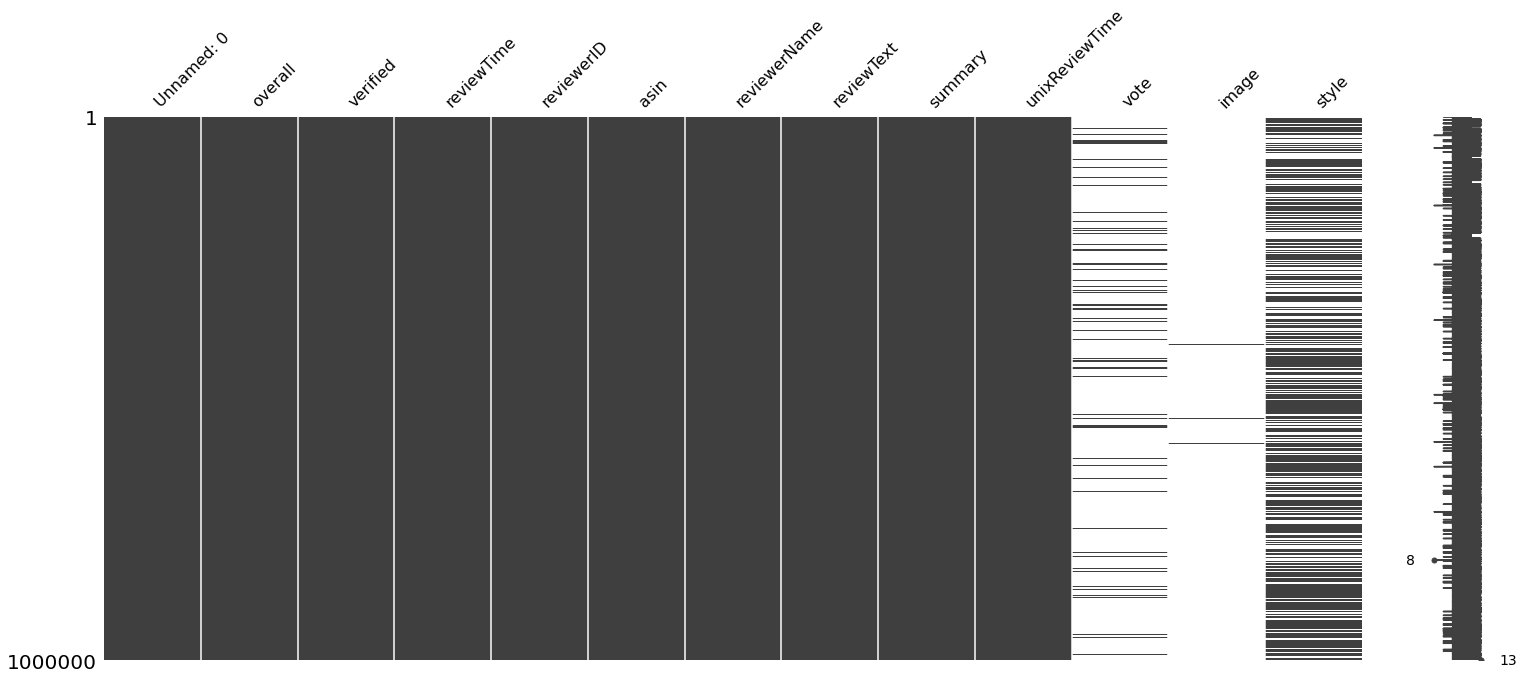

In [39]:
import pandas as pd
import missingno as msno
msno.matrix(df)

In [124]:
df = df.drop(columns=['Unnamed: 0','vote', 'image','style'])
df = df.dropna()
print(df.shape)
df = df[df.verified == True]
print(df.shape)
df = df.drop(columns=['verified','reviewTime','reviewerName'])

(999227, 9)
(928242, 9)


In [75]:
df.head()

,overall,reviewerID,asin,reviewText,summary,unixReviewTime
0,5,A2IYSO2XLF4Z84,B001MYGLJC,this is all you need for your reloading center,a great addition to your reloading center,1480377600
2,5,A4RZAXJSJQ38H,B001MYGLJC,Works like a charm! I have been running mine ...,Works like a charm,1480032000
3,5,AAB6KYNNRP6R9,B001MYGLJC,Good quality cheapest tumbler around! No compl...,Five Stars,1479513600
4,5,A1JRPDIVD7H6PS,B001MYGLJC,"Exactly what i was expecting, great piece",great,1479340800
5,5,A1B4DGTUCU2HED,B001MYGLJC,Good find,Five Stars,1479081600


In [125]:
df['overall'].value_counts()

5    607902
4    156242
3     67781
1     56427
2     39890
Name: overall, dtype: int64

In [126]:
df = df[df.overall > 3]

In [127]:
df.shape

(764144, 6)

In [128]:
df['asin'].value_counts()

B001N3MKT2    5347
B003WU9VKK    4744
B002LL0NEO    4295
B001PLG7UK    3513
B001T7QJ9O    3160
              ... 
B003LRDFZG       1
B003LUF58S       1
B002UPZD3C       1
B002UPQ9XU       1
B00295FINS       1
Name: asin, Length: 15075, dtype: int64

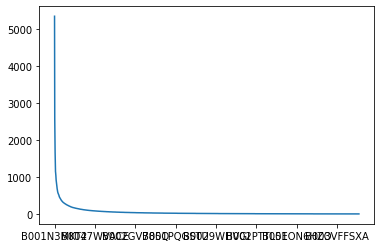

In [129]:
import matplotlib.pyplot as plt
df['asin'].value_counts().plot()

In [130]:
asin = df['asin'].value_counts()
asin = asin.to_frame()

In [131]:
asin

,asin
B001N3MKT2,5347
B003WU9VKK,4744
B002LL0NEO,4295
B001PLG7UK,3513
B001T7QJ9O,3160
...,...
B003LRDFZG,1
B003LUF58S,1
B002UPZD3C,1
B002UPQ9XU,1


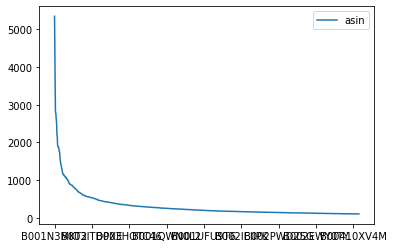

In [132]:
asin = asin[asin.asin > 100]
asin.plot()

In [133]:
asin.shape

(1631, 1)

### E

In [ ]:
# E 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
df = df.dropna()
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['reviewText'] = df['reviewText'].apply(word_tokenize)
df.iloc[:100]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-52-43385c79ccc2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText'] = df['reviewText'].str.lower()


,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
4800,1004800,5,True,"01 17, 2018",A1BFAN3LP9UHOB,B001N3MKT2,Amazon Customer,"[love, bottle, ., color, ,, size, ,, quality, ...",BRIGHT and durable,1516147200,2,['https://images-na.ssl-images-amazon.com/imag...,{'Color:': ' Pomegranate'}
4822,1004822,5,True,"01 10, 2018",ABVYNKFL9X0P9,B001N3MKT2,Robby Green,"[someone, carries, water, bottle, around, ofte...",A fantastic new color: Olive!,1515542400,9,['https://images-na.ssl-images-amazon.com/imag...,{'Color:': ' Olive'}
4877,1004877,4,True,"12 25, 2017",A3NWTLNFXER2TC,B001N3MKT2,Tom Hightower,"[saw, many, positive, recommendations, several...",Right now its sitting packed in my pack for th...,1514160000,5,['https://images-na.ssl-images-amazon.com/imag...,{'Color:': ' Blue'}
5038,1005038,5,True,"10 24, 2017",A3VK0RQ2YEIXRH,B001N3MKT2,Biffy,"[bought, for, ,, holding, water, drink, ., add...","Holds 32oz of water, BPA free, Made in USA",1508803200,2,['https://images-na.ssl-images-amazon.com/imag...,{'Color:': ' Spring Green'}
5045,1005045,5,True,"10 20, 2017",A3JR0NYWCRJCUP,B001N3MKT2,jayzeeoh,"[holds, fluid, ., 1, year, in, ,, lid, started...",Yay nalgene.,1508457600,2,['https://images-na.ssl-images-amazon.com/imag...,{'Color:': ' Blue'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23504,1023504,1,True,"03 25, 2017",A18FXARZ87TU8U,B0015VHIRQ,Karen Irwin,"[huge, blister, ..., absolutely, false, advert...",One Star,1490400000,3,['https://images-na.ssl-images-amazon.com/imag...,"{'Size:': ' Medium', 'Color:': ' Navy'}"
23559,1023559,1,True,"12 30, 2016",A3D8K17XIR4JNB,B0015VHIRQ,Amazon Customer,"[wore, casual, walk, 2, hours, came, take, fou...",Didn't except this from a quality product,1483056000,8,['https://images-na.ssl-images-amazon.com/imag...,"{'Size:': ' Medium', 'Color:': ' Dynamic BLue'}"
23609,1023609,5,True,"10 27, 2016",A2QLM7PPTJK15T,B0015VHIRQ,Amazon Customer,"[comfortable, fits, like, glove, ,, happy, fee...",Five Stars,1477526400,2,['https://images-na.ssl-images-amazon.com/imag...,"{'Size:': ' Large', 'Color:': ' Black/Red'}"
23630,1023630,1,True,"10 6, 2016",A1HO78X778QL52,B0015VHIRQ,Han Ngo,"[little, hole, 1st, time, tried, on, .]",One Star,1475712000,3,['https://images-na.ssl-images-amazon.com/imag...,"{'Size:': ' Small', 'Color:': ' Charcoal Lime'}"


In [ ]:
# B

# 2. ML architecture

In [ ]:
  # input                                                                                                                                                                                     # output  
  # ################                                                                                                                                                                          ##################################
  # (clients search# --------> word encoding (replace each text in every review) --------> dense embedding -------->       MLP of NN   -------->  choose a/ mult classifier   -------->       # (rank list of product (sentiment/ classification??)
  # key sentence)###                                                                      n-dimentions vec             as input for the NN          compare acurrancy                         # which is most relevant to search corpus)
  # existing review#                                                                                                                                 choose winning classfier/cluster         # !!!!!!relevent review's prodect ids !!!!
  # ################                                                                                                                                   for prediction model                   ##################################  
  # 
  #                                                                                                                                   -------->    choose a algorthm for sentiment
  # 

In [ ]:
# dense embedding  refer to link: https://www.tensorflow.org/text/guide/word_embeddings


#!!!! design a DN cluster that input one review and output all reviews in that group and sort by distance